<a href="https://colab.research.google.com/github/GO0108/MagicChords/blob/main/App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Professor, o link de acesso está no segundo link
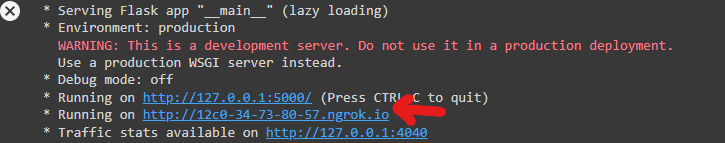

In [70]:
#Baixando flash ngrok, usar flash no colab
!mkdir -p /drive/ngrok-ssh
%cd /drive/ngrok-ssh
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok-stable-linux-amd64.zip
!unzip -u ngrok-stable-linux-amd64.zip
!cp /drive/ngrok-ssh/ngrok /ngrok
!chmod +x /ngrok

!pip install flask-ngrok


/drive/ngrok-ssh
--2022-04-18 20:11:55--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 18.205.222.128, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  39.1MB/s    in 0.3s    

2022-04-18 20:11:56 (39.1 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip


In [71]:
# Token de autenticação para acesso a flash ngrok, caso ocorra um erro ao abrir 
#o link é provável que não houve autenticação do ngrok (crie uma conta e use um token para rodar)
!/ngrok authtoken 27JjYKSINTlPVXJknyzB5m9AeFH_4SPhXnckexL5hoLSvxgBq

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


https://drive.google.com/drive/folders/1iGn3qp6AGXD6Mhnzc_OUYUEe_HwFx4kQ?usp=sharing

In [72]:
# Acessar templates disponíveis no drive acima, certifique-se que esteja no mesmo caminho no seu drive
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/MyDrive/templates"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Altera Nome.html'	'Comprar Moedas.html'	 index.html
'Altera Senha.html'	 Configurações.html	'Pagina Inicial.html'
 atualizado.html	 Conversao.html		'Sala Virtual.html'
 atualizado_nome.html	'Converter cifra.html'	'Tela de Cadastro.html'
 atualizado_senha.html	'Esqueceu Senha.html'	 usuario.html


In [73]:
cd /content/drive/MyDrive/templates

/content/drive/MyDrive/templates


In [77]:
from crypt import methods
from math import degrees
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok

app = Flask(__name__, template_folder='/content/drive/MyDrive/templates')
run_with_ngrok(app)  


@app.route("/")
@app.route("/index")
def home():
    return render_template('index.html')

@app.route("/cadastra", methods=['POST'])
def cadastra():
    nome = request.form['nome']
    data = request.form['data']
    email = request.form['email']
    pswrd = request.form['senha']
    confirm = request.form['senha2']
    #CREATE o usuário, passando os parâmetros lidos acima!
    return render_template("usuario.html", nome=nome, data=data,  email=email, senha=pswrd, confirm=confirm)

@app.route("/autentica",methods=['POST'])
def autentica():
    email = request.form['email']
    pswrd = request.form['senha']
    #Consultar se usuário existe, passando usr e pswrd!
    return render_template("Pagina Inicial.html", email=email, senha=pswrd)

@app.route("/altera_senha", methods=['POST'])
def altera_senha():
    pswrd_a = request.form['senha']
    pswrd_n = request.form['nova_senha']
    confirm = request.form['nova_senha2']
    #confirmar se a senha está correta e se as senhas novas batem
    return render_template("atualizado_senha.html", senha=pswrd_a, nova_senha=pswrd_n, confirm=confirm)

@app.route("/altera_nome", methods=['POST'])
def altera_nome():
    novo_n = request.form['novo_nome']
    return render_template("atualizado_nome.html", nome = novo_n)

@app.route("/nova", methods=['POST'])
def nova():
    email = request.form['email']
    pswrd_n = request.form['nova_senha']
    confirm = request.form['nova_senha2']
    #confirmar se as senhas novas batem
    return render_template("atualizado.html",email=email, senha=pswrd_n, confirm =confirm )
    

@app.route("/rec_senha")
def rec_senha():
    return render_template("Esqueceu Senha.html")

@app.route("/cadastro")
def cadastro():
    return render_template("Tela de Cadastro.html")

@app.route("/sala_virtual")
def sala_virtual():
    return render_template("Sala Virtual.html")

@app.route("/conversao")
def convercao():
    return render_template("Conversao.html")
  
@app.route("/compra")
def compra():
    return render_template("Comprar Moedas.html")

@app.route("/altera_n")
def altera_n():
    return render_template("Altera Nome.html")

@app.route("/altera_s")
def altera_s():
    return render_template("Altera Senha.html")

@app.route("/inicio")
def inicial():
    return render_template("Pagina Inicial.html")

@app.route("/configuracao")
def configuracao():
    return render_template("Configurações.html")

@app.route("/conversao_cifra")
def conversao_cifra():
    return render_template("Converter cifra.html")

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
Exception in thread Thread-504:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/usr/local/lib/python3.7/dist-packages/urllib3/util/connection.py", line 80, in create_connection
    raise err
  File "/usr/local/lib/python3.7/dist-packages/urllib3/util/connection.py", line 70, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py", line 354, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "/usr/lib/python3.7/http/client.py"